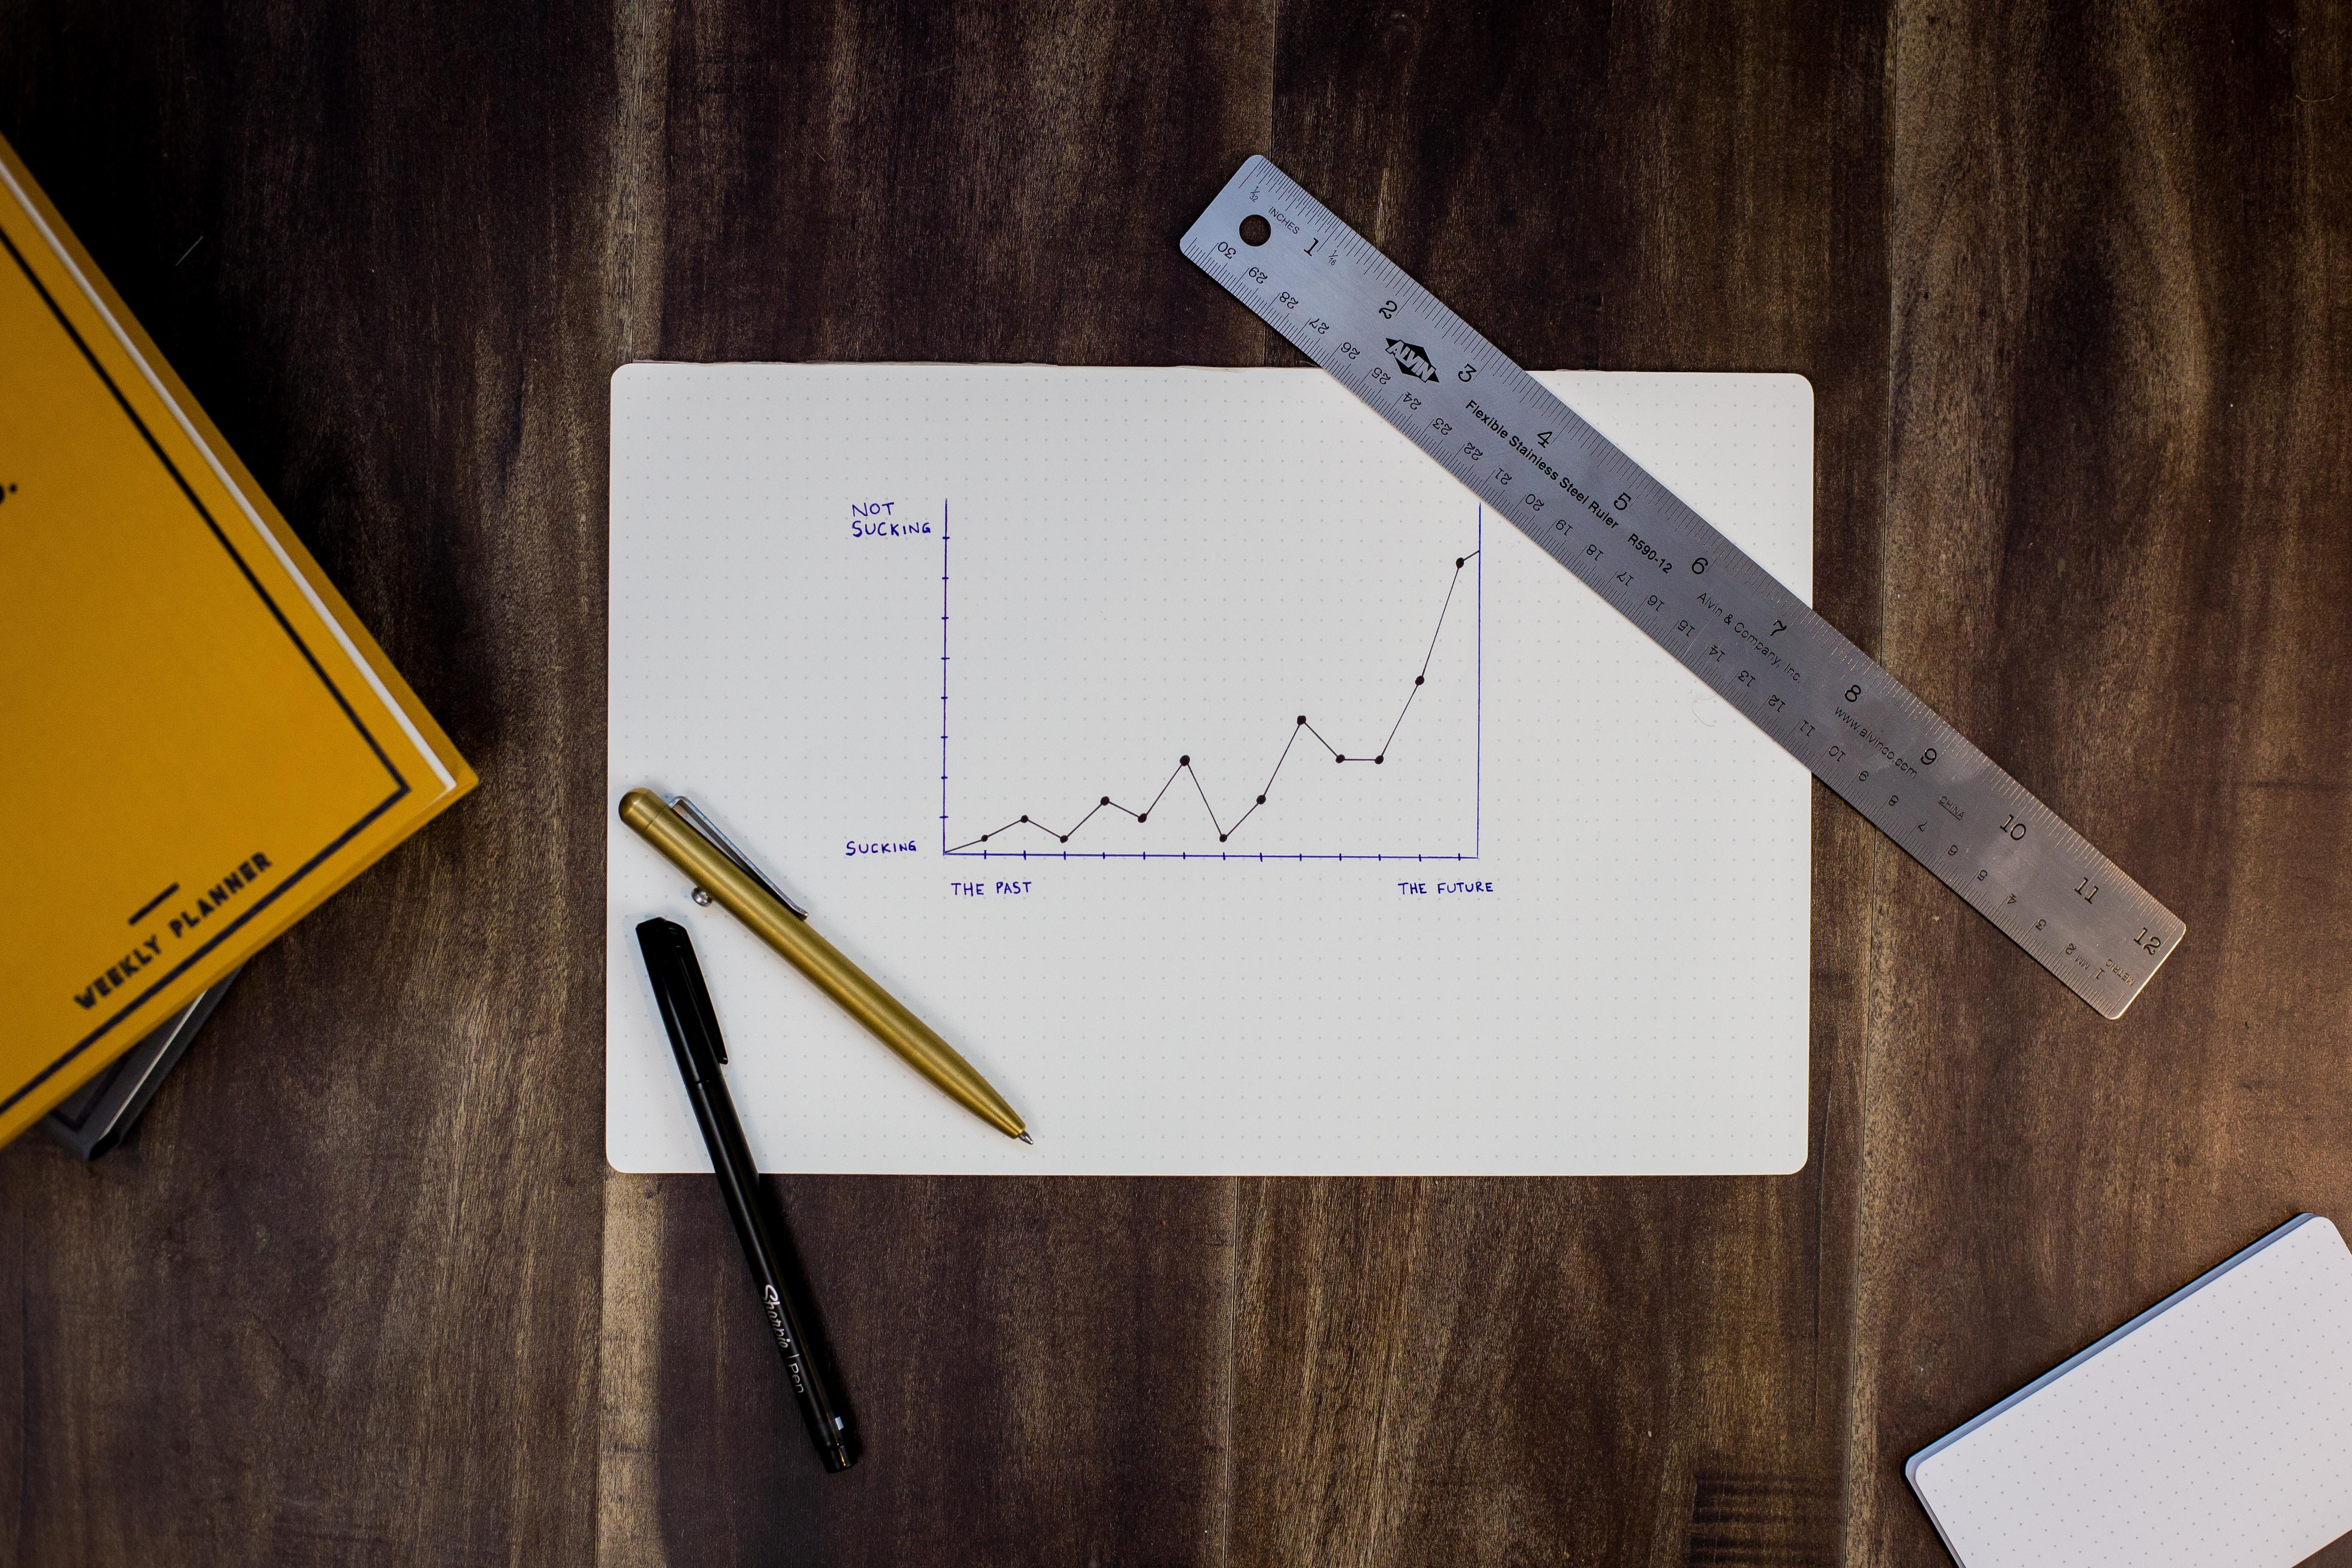

In [192]:
from IPython.display import Image
Image(filename='/content/Forecast.jpg',width=1500,height=450)

In [25]:
# Importing ML Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing DL Libraries
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Flatten

In [4]:
# Time series data
time_series_data = [110,225,290,350,399,450,500,530,592,650]

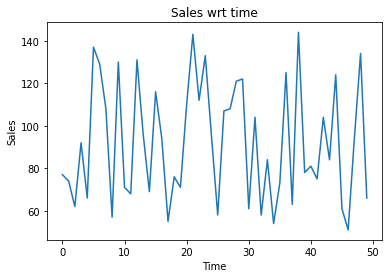

In [183]:
# Plotting time series data
plt.plot(time_series_data)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales wrt time');

In [14]:
# Using time stamps to break the data into no_of_timestamps forming independent and dependent variable
time_series_data = [110,225,290,350,399,450,500,530,592,650]
no_of_time_stamps = 3
seq_x,seq_y = [],[]
for i in range(len(time_series_data)):
  end_value = i+no_of_time_stamps
  if end_value>len(time_series_data)-1:
    break;
  seq_x.append(time_series_data[i:end_value])
  seq_y.append(time_series_data[end_value])

seq_x = np.array(seq_x)
seq_y = np.array(seq_y)

In [34]:
# Converting seq_x into 3D shape
n_features = 1
seq_x = seq_x.reshape((seq_x.shape[0],seq_x.shape[1],n_features))

In [ ]:
# reshaped x
seq_x

In [ ]:
seq_x.shape

In [40]:
# LSTM Architecture
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(no_of_time_stamps,n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mape')

In [ ]:
# Model Summary
model.summary()

In [ ]:
# Model fitting
model.fit(seq_x,seq_y,epochs=200,verbose=0)

In [89]:
# Output predictions from time series data
x_input = np.array(time_series_data[-3:])
temp_input = list(x_input)
list_output = []
i = 0
while(i<10):
  if (len(temp_input)>3):
    x_input = np.array(temp_input[1:])
    x_input = x_input.reshape((1,no_of_time_stamps,n_features))
    predictions = model.predict(x_input,verbose=0)[0][0]
    temp_input.append(predictions)
    temp_input=temp_input[1:]
    list_output.append(predictions)
    i = i+1
  

  else:
    x_input = x_input.reshape((1,no_of_time_stamps,n_features))
    predictions = model.predict(x_input,verbose=0)[0][0]
    temp_input.append(predictions)
    list_output.append(predictions)
    i = i+1

In [90]:
print(list_output)

[690.4699, 758.0281, 822.5672, 884.0841, 963.71576, 1042.7062, 1126.1204, 1223.0963, 1322.9642, 1431.4103]


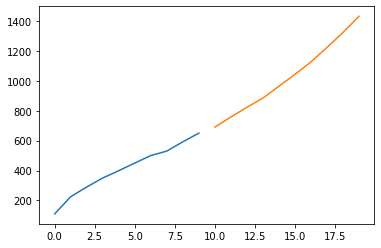

In [96]:
day_old = np.arange(0,10)
day_prediction = np.arange(10,20)

plt.plot(day_old,time_series_data)
plt.plot(day_prediction,list_output)

**Considering if we have multiple series to be forecasted**

In [116]:
# Random Dataframe generation with 2 columns having 50 records
data_sku1 = np.random.randint(1,100,50)
data_sku2 = np.random.randint(50,150,50)

df_sku1 = pd.DataFrame(data_sku1,columns=['SKU_1'])
df_sku2 = pd.DataFrame(data_sku2,columns=['SKU_2'])

df = pd.concat([df_sku1,df_sku2],1)

In [117]:
# Data head
df.head(2)

SKU_1  SKU_2
0     82     77
1     56     74

In [179]:
# Data shape
df.shape

(50, 2)

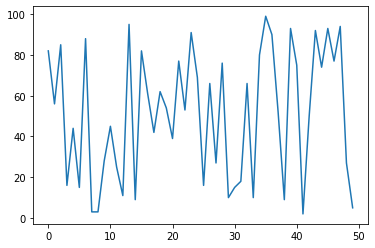

In [118]:
# plotting of sku_1
plt.plot(df['SKU_1'])

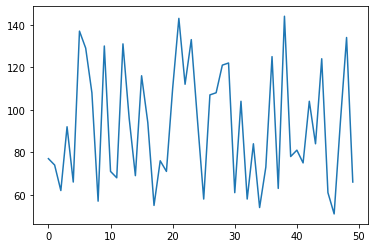

In [119]:
# plotting of sku2
plt.plot(df['SKU_2'])

In [177]:
# Time series data
df_sku_predictions = []
for j in range(len(df.columns)):
  time_series_data = list(df.iloc[:,j])
  no_of_time_stamps = 3

  # Using time stamps to break the data into no_of_timestamps forming independent and dependent variable
  seq_x,seq_y = [],[]
  for i in range(len(time_series_data)):
    end_value = i+no_of_time_stamps
    if end_value>len(time_series_data)-1:
      break;
    seq_x.append(time_series_data[i:end_value])
    seq_y.append(time_series_data[end_value])

  seq_x = np.array(seq_x)
  seq_y = np.array(seq_y)

  # Converting seq_x into 3D shape
  n_features = 1
  seq_x = seq_x.reshape((seq_x.shape[0],seq_x.shape[1],n_features))

  # LSTM Architecture
  model = Sequential()
  model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(no_of_time_stamps,n_features)))
  model.add(LSTM(50,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mape')

  # Model Fitting
  model.fit(seq_x,seq_y,epochs=200,verbose=0)

  # Predictions for coming 10 data points
  x_input = np.array(time_series_data[-3:])
  temp_input = list(x_input)
  list_output = []
  i = 0
  while(i<10):
    if (len(temp_input)>no_of_time_stamps):
      x_input = np.array(temp_input[1:])
      x_input = x_input.reshape((1,no_of_time_stamps,n_features))
      predictions = model.predict(x_input,verbose=0)[0][0]
      temp_input.append(predictions)
      temp_input=temp_input[1:]
      list_output.append(predictions)
      i = i+1
    else:
      x_input = x_input.reshape((1,no_of_time_stamps,n_features))
      predictions = model.predict(x_input,verbose=0)[0][0]
      temp_input.append(predictions)
      list_output.append(predictions)
      i = i+1

  df_sku_predictions.append(list_output)

final_predictions = pd.DataFrame(df_sku_predictions,index=list(df.columns))
final_predictions = final_predictions.round(2)
final_predictions.columns = ['Forecast_'+str(i) for i in range(len(final_predictions.columns))]

In [178]:
final_predictions

Forecast_0  Forecast_1  Forecast_2  ...  Forecast_7  Forecast_8  Forecast_9
SKU_1       39.34       45.42       11.83  ...       43.89        8.94       63.05
SKU_2       54.30      103.18      117.97  ...       65.22       66.85      108.06

[2 rows x 10 columns]